In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Задания с третьего урока с демо-курса по статистике

In [5]:
#В этой части у нас датасет такси из перу

taxi = pd.read_csv("Datasets/taxi_peru.csv",sep=';',parse_dates=['start_at','end_at', 'arrived_at'])

In [6]:
#Проверим, что все ок
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Пояснения:\
Вернёмся к данным о поездках на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!

journey_id – уникальный id поездки\
user_id – id пользователя\
driver_id – id водителя\
taxi_id – id машины\
icon – тип поездки\
start_type – тип заказа (asap, reserved, delayed)\
start_at – время начала поездки\
start_lat – исходное местоположение пользователя, широта\
start_lon – исходное местоположение пользователя, долгота\
end_at – время окончания поездки\
end_lat – итоговое местоположение, широта\
end_lon – итоговое местоположение, долгота\
end_state – состояние заказа\
driver_start_lat – исходное местоположение водителя, широта\
driver_start_lon – исходное местоположение водителя, долгота\
arrived_at – время прибытия водителя\
source – платформа, с которой сделан заказ\
driver_score – оценка водителя клиентом\
rider_score – оценка клиента водителем

# Задания по датасету

Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [8]:
taxi['source'].value_counts(normalize=True)

source
iPhone     0.423743
web        0.331956
Android    0.213546
iPad       0.024839
Wap        0.005916
Name: proportion, dtype: float64

**Ответ: 42**

Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).

Какой график получился?



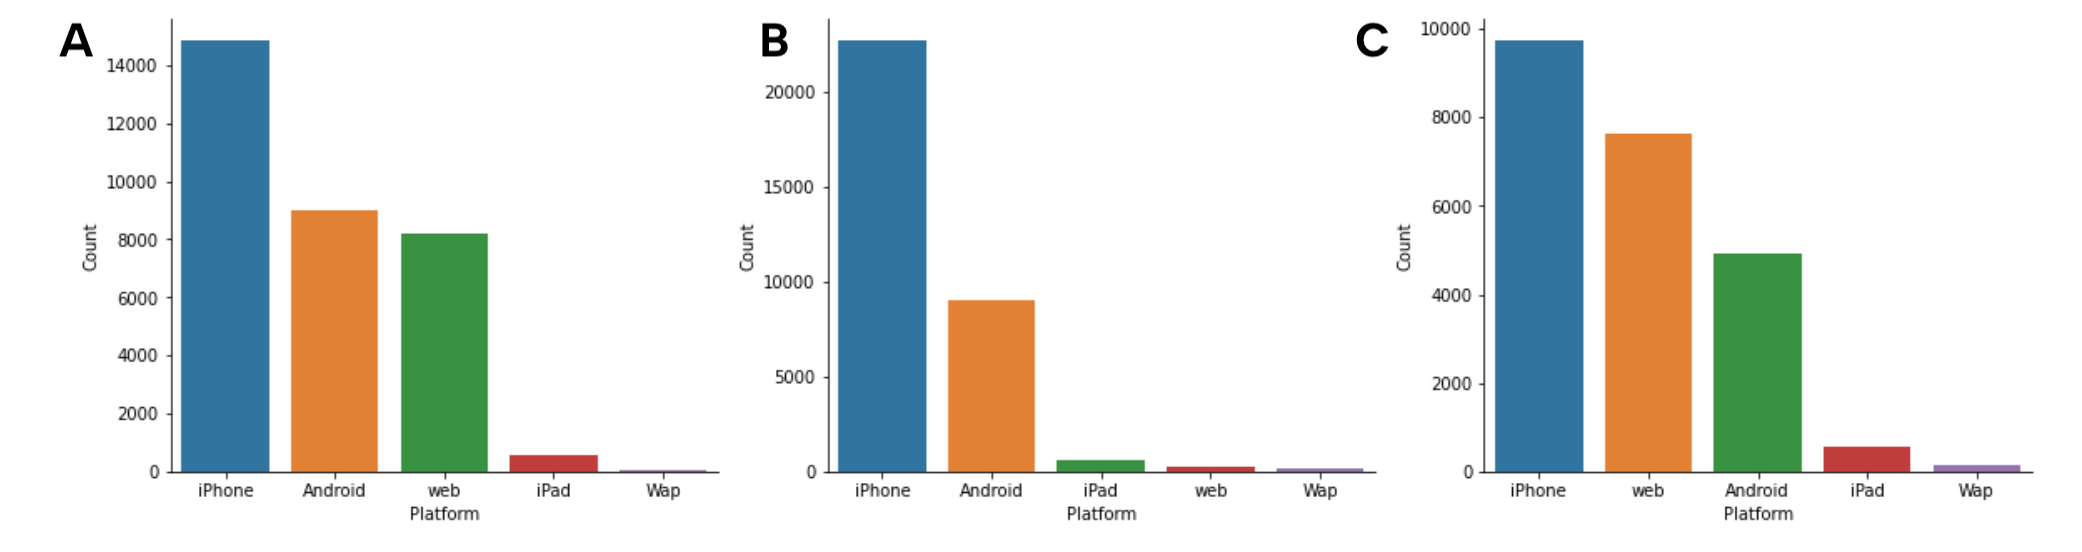

<Axes: xlabel='source', ylabel='count'>

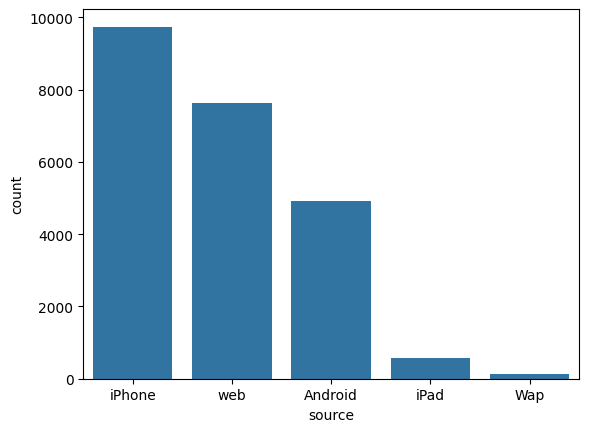

In [27]:
#Тут нам понадобится библиотека seaborn
sns.barplot(taxi['source'].value_counts())

Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.\
sns.countplot(taxi['source'])

Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

<Axes: xlabel='icon', ylabel='count'>

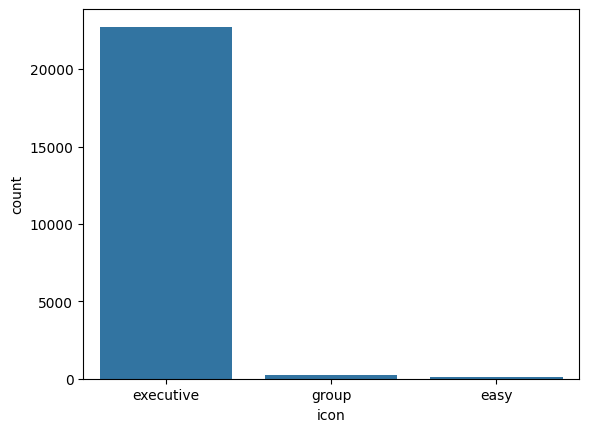

In [29]:
sns.countplot(x = taxi['icon'])

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.

<Axes: xlabel='source', ylabel='count'>

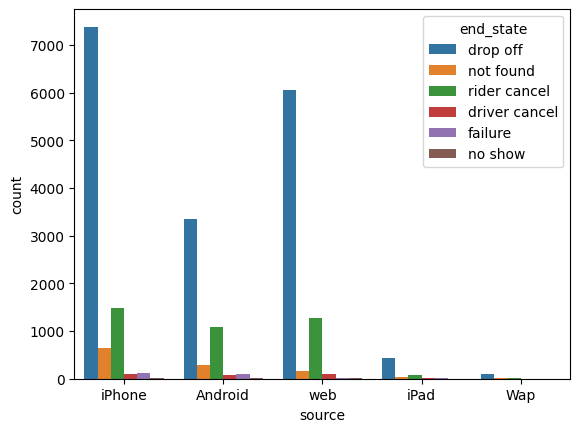

In [30]:
sns.countplot(x = 'source',hue = 'end_state', data = taxi)

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

Посчитайте частоту встречаемости каждой из оценок\
Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))\
Сбросьте индексы\
Переименуйте колонки в driver_score и percentage\
Отсортируйте по driver_score в порядке возрастания (от 0 до 5)\
Запишите результат в driver_score_counts\
Полезные функции:\
\
.mul() – умножение, более удобный вариант для использования в цепочке методов\ 
.round() – округление\
.reset_index() – сбросить индекс\
.value_counts() – сколько раз встречается каждое значение переменной

In [78]:
driver_score_counts = taxi['driver_score'].value_counts(normalize=True)\
    .mul(100).round(2).reset_index()\
    .rename({'index': 'driver_score','driver_score':'percentage'}).sort_values('driver_score')

In [79]:
#Посмотрим что получилось
driver_score_counts

,driver_score,proportion
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


**Правильное решение(нейросеть)**

In [80]:
driver_score_counts = (taxi['driver_score']
                      .value_counts(normalize=True)
                      .mul(100)
                      .round(2)
                      .rename_axis('driver_score')
                      .reset_index(name='percentage')
                      .sort_values('driver_score'))


In [81]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


Теперь строим график! Сначала импортируем библиотеки:

import seaborn as sns\
import matplotlib.pyplot as plt\
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)\
ax.set(xlabel='Driver score', ylabel='Percentage')\
sns.despine()  # убрать часть рамки графика\
plt.show()

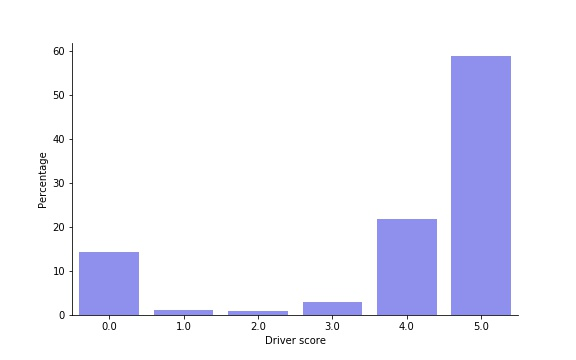

 **Ответ: 1, там нужно добавить кавычки**

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [86]:
rider_score_counts = (taxi['rider_score']
                      .value_counts(normalize=True)
                      .mul(100)
                      .round(2)
                      .rename_axis('rider_score')
                      .reset_index(name='percentage')
                      .sort_values('rider_score'))


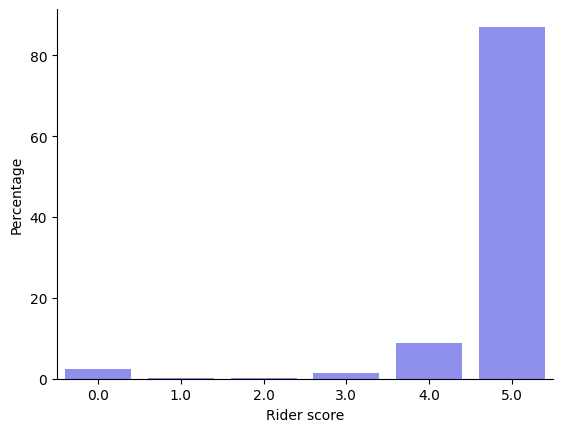

In [88]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() # убрать часть рамки графика
plt.show()

# Задания по мини-проекту с третьего урока

Задачи\
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных\
значений, описательную статистику.
- Какой клиент совершил больше всего успешных операций? (success == True)
- С какой платформы осуществляется наибольшее количество успешных операций?
- Какую платформу предпочитают премиальные клиенты?
- Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
- Постройте график распределения числа успешных операций
- Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число\
успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

Описание данных
user_data:

client – идентификатор пользователя\
premium – является ли клиент премиальным\
age – возраст

logs:

client – идентификатор пользователя\
success – результат (успех – 1, нет – 0)\
platform – платформа\
time – время в формате Unix

In [2]:
users = pd.read_csv("Datasets/user_data.csv",sep=',')

In [4]:
user_logs = pd.read_csv("Datasets/logs.csv",sep=',')

In [10]:
#Узнаем размер таблиц
users.shape

(2954, 3)

In [9]:
user_logs.shape

(4500, 4)

In [15]:
#Типы переменных
users.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [16]:
user_logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object